In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [149]:
df = pd.read_csv("C:/Users/brent/OneDrive/Escritorio/RecaudaciónTributaria/recaudacion-tributaria-datos-mensuales.csv")
df.head()

,indice_tiempo,total_recaudacion,subtotal_dgi,subtotal_dga,seguridad_social,total_recaudacion_var_ia,subtotal_dgi_var_ia,subtotal_dga_var_ia,seguridad_social_var_ia
0,1997-01-01,4353.758957,2313.675149,884.341249,1155.742559,NaN,NaN,NaN,NaN
1,1997-02-01,3634.762208,2038.650251,744.108489,852.003468,NaN,NaN,NaN,NaN
2,1997-03-01,3531.360254,1955.433261,799.976108,775.950885,NaN,NaN,NaN,NaN
3,1997-04-01,3939.777343,2154.340531,960.913514,824.523297,NaN,NaN,NaN,NaN
4,1997-05-01,4600.930508,2778.211277,984.078415,838.640816,NaN,NaN,NaN,NaN


In [151]:
# cuántas filas y columnas tiene nuestro DF
df.shape

(338, 9)

In [153]:
# veamos cómo están nombradas las variables
df.columns

Index(['indice_tiempo', 'total_recaudacion', 'subtotal_dgi', 'subtotal_dga',
       'seguridad_social', 'total_recaudacion_var_ia', 'subtotal_dgi_var_ia',
       'subtotal_dga_var_ia', 'seguridad_social_var_ia'],
      dtype='object')

In [155]:
#Muestra un resumen completo del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   indice_tiempo             338 non-null    object 
 1   total_recaudacion         338 non-null    float64
 2   subtotal_dgi              338 non-null    float64
 3   subtotal_dga              338 non-null    float64
 4   seguridad_social          338 non-null    float64
 5   total_recaudacion_var_ia  326 non-null    float64
 6   subtotal_dgi_var_ia       290 non-null    float64
 7   subtotal_dga_var_ia       290 non-null    float64
 8   seguridad_social_var_ia   290 non-null    float64
dtypes: float64(8), object(1)
memory usage: 23.9+ KB


In [157]:
# Convertir la columna de fechas a formato datetime
df["indice_tiempo"] = pd.to_datetime(df["indice_tiempo"])

# Obtener el año actual
anio_actual = pd.Timestamp.today().year

# Filtrar los últimos 3 años
df_ultimos_3_anios = df[df["indice_tiempo"].dt.year >= (anio_actual - 3)]

# Mostrar los primeros registros del nuevo dataset
df_ultimos_3_anios.head()

,indice_tiempo,total_recaudacion,subtotal_dgi,subtotal_dga,seguridad_social,total_recaudacion_var_ia,subtotal_dgi_var_ia,subtotal_dga_var_ia,seguridad_social_var_ia
300,2022-01-01,1.171943e+06,592368.220503,269661.122812,309913.720446,0.516372,0.552926,0.327452,0.646158
301,2022-02-01,1.166514e+06,601202.000752,306425.024041,258887.215815,0.627856,0.565780,0.733741,0.660704
302,2022-03-01,1.241089e+06,585106.663420,391818.682050,264163.611647,0.624764,0.529989,0.775086,0.643831
303,2022-04-01,1.341595e+06,714474.348860,336534.497495,290586.509765,0.640329,0.646766,0.563843,0.721280
304,2022-05-01,1.551370e+06,864042.554569,384304.162031,303023.246234,0.798732,0.872008,0.681480,0.757985


In [159]:
# Comprobamos si hay nulos
df_ultimos_3_anios.isnull().sum()

indice_tiempo               0
total_recaudacion           0
subtotal_dgi                0
subtotal_dga                0
seguridad_social            0
total_recaudacion_var_ia    0
subtotal_dgi_var_ia         0
subtotal_dga_var_ia         0
seguridad_social_var_ia     0
dtype: int64

In [161]:
# Renombarar columnas para mayor compreniòn
df_ultimos_3_anios = df_ultimos_3_anios.rename(columns={"subtotal_dgi": "DGI", "subtotal_dga": "DGA"}).copy()

In [163]:
df_ultimos_3_anios

,indice_tiempo,total_recaudacion,DGI,DGA,seguridad_social,total_recaudacion_var_ia,subtotal_dgi_var_ia,subtotal_dga_var_ia,seguridad_social_var_ia
300,2022-01-01,1.171943e+06,5.923682e+05,2.696611e+05,3.099137e+05,0.516372,0.552926,0.327452,0.646158
301,2022-02-01,1.166514e+06,6.012020e+05,3.064250e+05,2.588872e+05,0.627856,0.565780,0.733741,0.660704
302,2022-03-01,1.241089e+06,5.851067e+05,3.918187e+05,2.641636e+05,0.624764,0.529989,0.775086,0.643831
303,2022-04-01,1.341595e+06,7.144743e+05,3.365345e+05,2.905865e+05,0.640329,0.646766,0.563843,0.721280
304,2022-05-01,1.551370e+06,8.640426e+05,3.843042e+05,3.030232e+05,0.798732,0.872008,0.681480,0.757985
305,2022-06-01,1.680901e+06,9.839717e+05,3.812812e+05,3.156485e+05,0.821418,0.975456,0.510531,0.831550
306,2022-07-01,1.745178e+06,9.112681e+05,4.037051e+05,4.302049e+05,0.870101,1.008316,0.686001,0.792465
307,2022-08-01,1.731319e+06,9.721383e+05,4.056555e+05,3.535257e+05,0.722181,0.713831,0.668156,0.813893
308,2022-09-01,2.127181e+06,9.990536e+05,7.589519e+05,3.691752e+05,1.178787,0.926838,1.980186,0.817216
309,2022-10-01,1.964056e+06,1.150852e+06,4.199222e+05,3.932819e+05,0.927845,1.109644,0.579255,0.896573


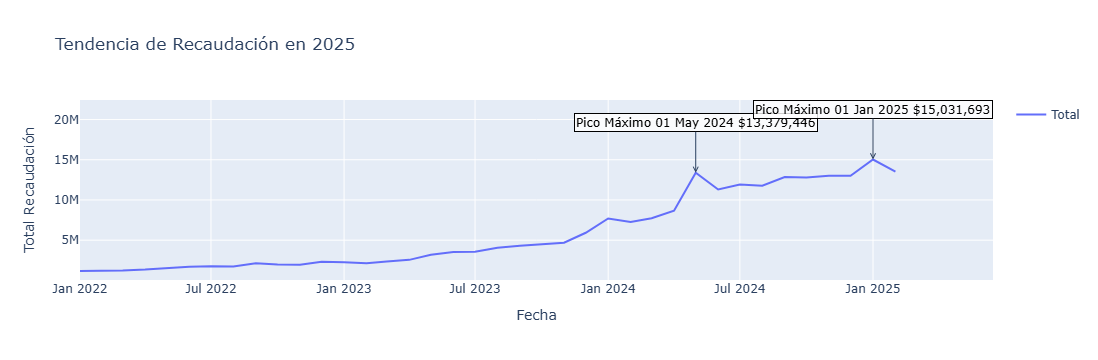

In [165]:
# Figuras
figAnios = go.Figure()

figAnios.add_trace(go.Scatter(x=df_ultimos_3_anios["indice_tiempo"],
                       y=df_ultimos_3_anios["total_recaudacion"],
                       mode='lines',
                       name='Total'))
figAnios.update_layout(go.Layout(
            title='Tendencia Anual',
            xaxis = dict(title = 'Año'),
            yaxis = dict(title = 'Total Recaudación')
))

# Convertir la columna a formato datetime si no lo está
df["indice_tiempo"] = pd.to_datetime(df["indice_tiempo"], errors='coerce')

# Filtrar solo los datos del año 2024
df_2024 = df[df["indice_tiempo"].dt.year == 2024]

# Encontrar el pico máximo de recaudación en 2024
pico_max_2024 = df_2024["total_recaudacion"].max()
fila_pico_2024 = df_2024[df_2024["total_recaudacion"] == pico_max_2024]

# Extraer la fecha y el monto exactos
fecha_pico = pd.Timestamp(fila_pico_2024["indice_tiempo"].values[0])  # Convertir a Timestamp
monto_pico = fila_pico_2024["total_recaudacion"].values[0]  # Monto del pico

# Agregar anotación en el punto máximo 2024
figAnios.add_annotation(
    x=fecha_pico,
    y=monto_pico,
    text=f"Pico Máximo\n{fecha_pico.strftime('%d %b %Y')}\n${monto_pico:,.0f}",
    showarrow=True,
    arrowhead=5,
    ax=0,
    ay=-50,
    bgcolor="rgba(255,255,255,0.8)",
    bordercolor="black",
    font=dict(size=12, color="black")
)

# Filtrar solo los datos del año 2024
df_2025 = df[df["indice_tiempo"].dt.year == 2025]

# Encontrar el pico máximo de recaudación en 2024
pico_max_2025 = df_2025["total_recaudacion"].max()
fila_pico_2025 = df_2025[df_2025["total_recaudacion"] == pico_max_2025]

# Extraer la fecha y el monto exactos
fecha_pico_2025 = pd.Timestamp(fila_pico_2025["indice_tiempo"].values[0])  # Convertir a Timestamp
monto_pico_2025 = fila_pico_2025["total_recaudacion"].values[0]  # Monto del pico

# Agregar anotación en el punto máximo 2025
figAnios.add_annotation(
    x=fecha_pico_2025,
    y=monto_pico_2025,
    text=f"Pico Máximo\n{fecha_pico_2025.strftime('%d %b %Y')}\n${monto_pico_2025:,.0f}",
    showarrow=True,
    arrowhead=5,
    ax=0,
    ay=-50,
    bgcolor="rgba(255,255,255,0.8)",
    bordercolor="black",
    font=dict(size=12, color="black")
)

# Configurar diseño del gráfico
figAnios.update_layout(
    title="Tendencia de Recaudación en 2024",
    xaxis=dict(title="Fecha", tickformat="%b %Y"),
    yaxis=dict(title="Total Recaudación"),
    showlegend=True
)

# Configurar diseño del gráfico
figAnios.update_layout(
    title="Tendencia de Recaudación en 2025",
    xaxis=dict(title="Fecha", tickformat="%b %Y"),
    yaxis=dict(title="Total Recaudación"),
    showlegend=True
)


# Mostrar gráfico
figAnios.show()

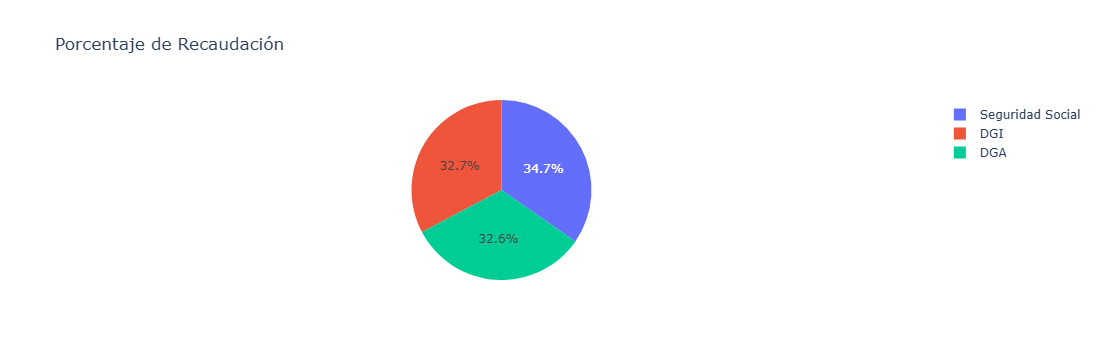

In [167]:
figTorta = go.Figure()

figTorta.add_trace(go.Pie(
    labels=["DGI", "DGA", "Seguridad Social"],
    values=df_ultimos_3_anios["total_recaudacion"]
))
figTorta.update_layout(go.Layout(
            title='Porcentaje de Recaudación'
))

KeyError: 'Año'

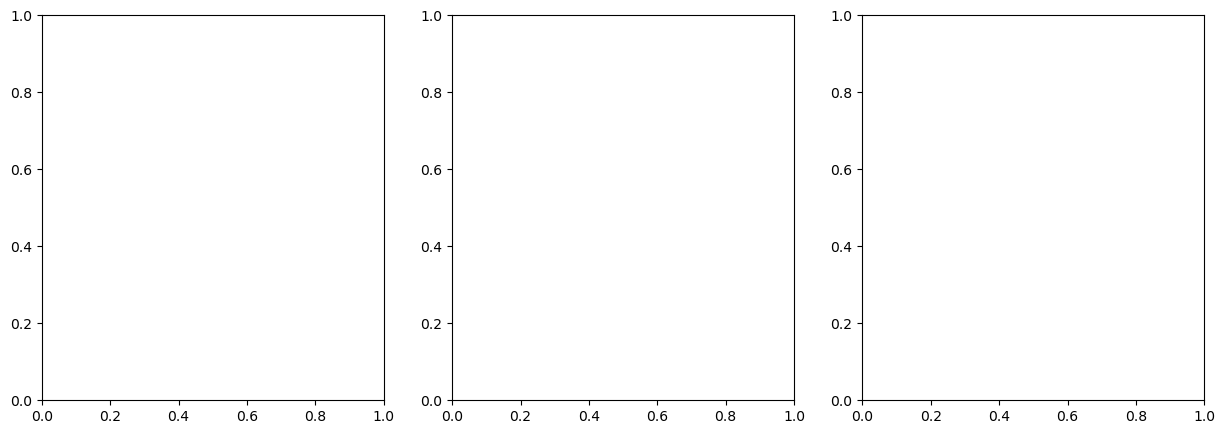

In [169]:
# Crear 3 recuadros horizontales
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  

for i, anio in enumerate(ultimos_anios):
    df_anio = df[df["Año"] == anio]

    recaudacion = {
        "DGI": df_anio["subtotal_dgi"].sum(),
        "DGA": df_anio["subtotal_dga"].sum(),
        "Seguridad Social": df_anio["seguridad_social"].sum()
    }

    axs[i].bar(recaudacion.keys(), recaudacion.values(), color=['blue', 'green', 'orange'])
    axs[i].set_title(f"Recaudación {anio}")
    axs[i].set_xlabel("Organismo")
    axs[i].set_ylabel("Total Recaudación")

    for x, y in zip(recaudacion.keys(), recaudacion.values()):
        axs[i].text(x, y, f"{y:,.0f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()